----
## **<font color="crimson"> Ya ok bases de datos, solo falta diseño </font>**

In [30]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [35]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de ERA-5 </font>**

In [36]:
fileu_era5 = 'datasetsok/u_daily_500_200_1979-2024.nc'
filev_era5 = 'datasetsok/v_wind_1979-2024_MSRG.nc'

In [37]:
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']
v_ds = xr.open_dataset(filev_era5)
v_era5 = v_ds['v']

### **<font color="Purple"> Datos de HadGEM3 </font>**

In [38]:
fileu_hg = 'datasetsok/uday_250hpa_HG_1979_2014.nc'
filev_hg = 'datasetsok/vday_250hpa_HG_1979_2014.nc'

In [39]:
# Abrir archivos y seleccionar variables a usar 
u_ds_hg=xr.open_dataset(fileu_hg)
ua_hg=u_ds_hg['ua']  

v_ds_hg=xr.open_dataset(filev_hg )
va_hg=v_ds_hg['va']

----
## **<font color="crimson"> HadGEM3 vs ERA-5 (anual) </font>**

#### **<font color="Purple"> Datos de viento ERA-5 (anual) </font>**

In [40]:
#Seleccionar solo 200 hPa 
u200E5 = u_era5.sel(pressure_level=200)
# v200E5 = v_era5.sel(pressure_level=200)

In [41]:
# v200E5 = v200E5.sel(latitude=slice(40,10),longitude=slice(-133,-63))
u200E5 = u200E5.sel(latitude=slice(40,10),longitude=slice(227,297))

In [42]:
u200E5_anual=u200E5.mean(dim='time') 
# v200E5_anual=v200E5.mean(dim='time') 

#### **<font color="Purple"> Datos de viento HadGEM3 (anual) </font>**

In [43]:
u200HG = ua_hg.sel(lat=slice(10, 40), lon=slice(227,297))
# v200HG = va_hg.sel(lat=slice(10, 40), lon=slice(232,294)) 
#para que tengan las mismas latitudes y longitudes

In [44]:
u200HG_anual = ua_hg.mean(dim='time')
# v200HG_anual = va_hg.mean(dim='time')


#### **<font color="Purple"> Datos HadGEM3 de viento zonal en DJF</font>**

In [45]:
u200HG_DJF=u200HG.groupby(u200HG.time.dt.season).mean(dim='time')[0]

In [46]:
#tarda mucho!!! por??
# v200HG_DJF=v200HG.groupby(v200HG.time.dt.season).mean(dim='time')[0]


#### **<font color="Purple"> Datos ERA-5 de viento zonal en DJF</font>**


In [47]:
u200E5_DJF = u200E5.groupby(u200E5.time.dt.season).mean(dim='time')[0]

In [48]:
# v200E5_DJF = v200E5.groupby(v200E5.time.dt.season).mean(dim='time')[0]

Text(0.5, 1.0, 'ERA-5 (1979-2019)')

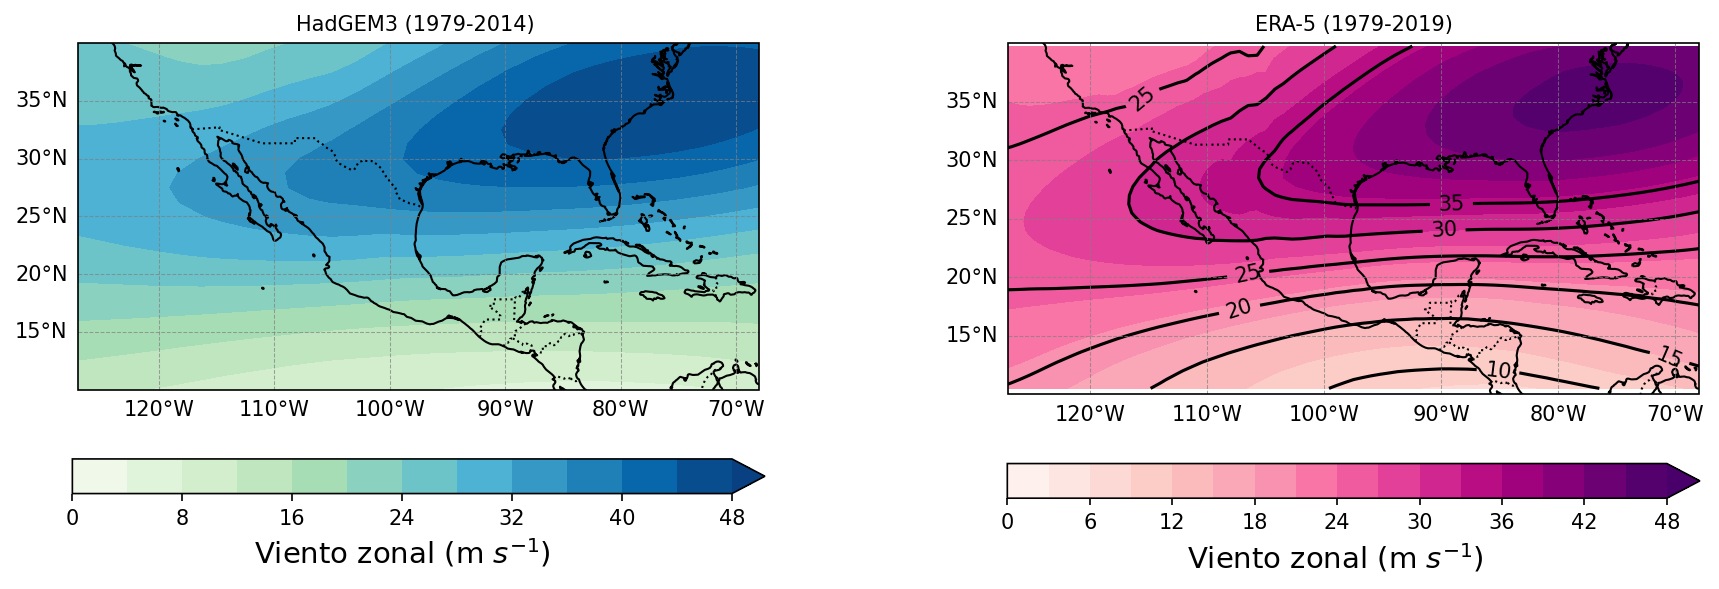

In [49]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

# Subplot 1
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
cs = ax1.contourf(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF, levels=np.arange(0, 50,4), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
# cc=ax1.contour(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
# ax1.quiver(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF.values, v200HG_DJF.values, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('HadGEM3 (1979-2014) ', fontsize=10)

# Subplot 2
ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines()
cs = ax2.contourf(u200E5_DJF.longitude, u200E5_DJF.latitude, u200E5_DJF, levels=np.arange(0, 50, 3), cmap='RdPu', extend='max', transform=ccrs.PlateCarree())
cc=ax2.contour(u200E5_DJF.longitude, u200E5_DJF.latitude, u200E5_DJF,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.09, ax=ax2)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=14)
plt.title('ERA-5 (1979-2019)', fontsize=10)

# plt.tight_layout(h_pad=3)
# plt.subplots_adjust(top=0.8)
# fig.suptitle('Viento zonal a 200 hPa durante DJF',fontsize=14,color="K");
#plt.savefig("Estadística.png", bbox_inches='tight')

   
#### **<font color="crimson"> Viento zonal anual y en DJF en HadGEM y en ERA-5</font>**


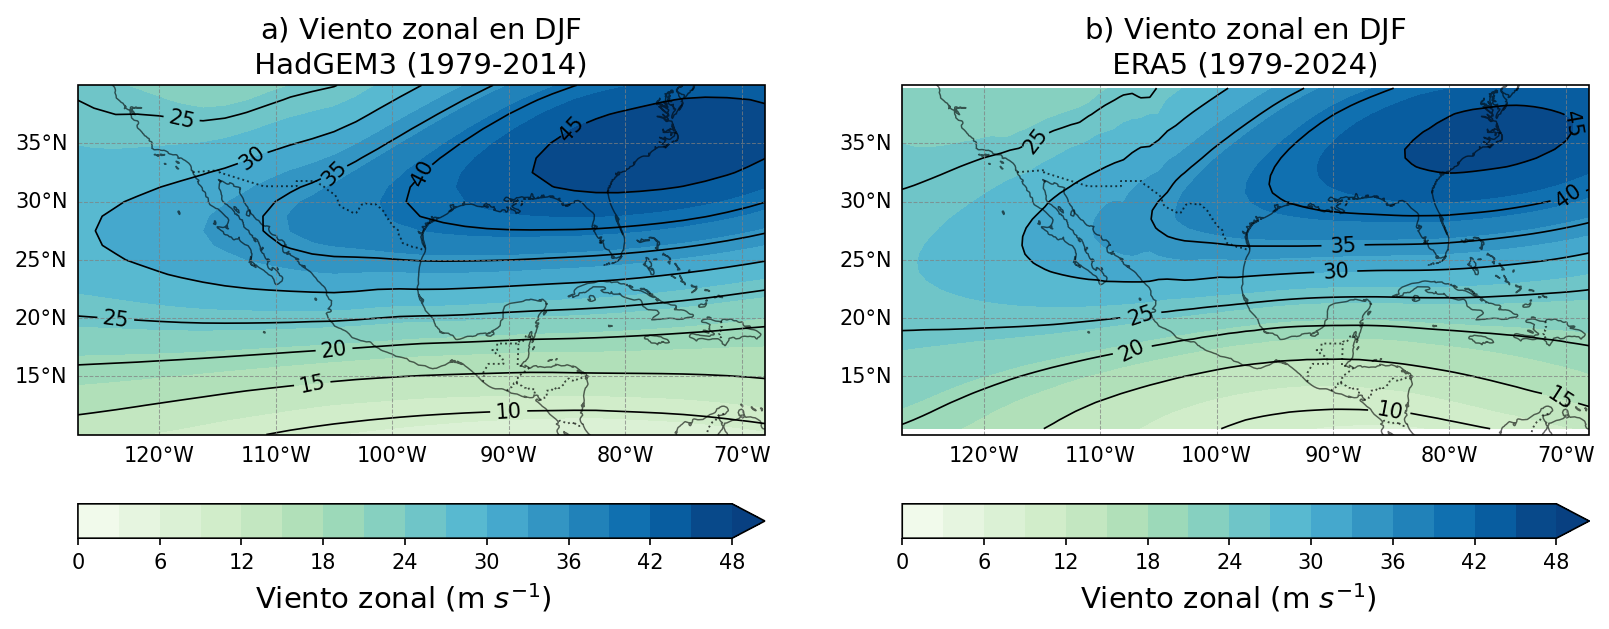

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6), dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})

# # Subplot 1 ANUAL HadGEM
# ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
# ax1.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax1.contourf(u200HG_anual.lon, u200HG_anual.lat, u200HG_anual, levels=np.arange(0, 50,3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
# cc=ax1.contour(u200HG_anual.lon, u200HG_anual.lat, u200HG_anual,levels=np.arange(0,40,3),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# # ax1.quiver(u200HG_anual.lon, u200HG_anual.lat, u200HG_anual.values, v200HG_anual.values, transform=ccrs.PlateCarree())
# ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
# ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
# cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
# plt.title('Anual (1979-2014) \n HadGEM3 ', fontsize=12)

# Subplot 2 ANUAL ERA5
# ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
# ax2.coastlines(linewidth=0.7,alpha=0.6)
# cs = ax2.contourf(u200E5_anual.longitude,u200E5_anual.latitude,u200E5_anual, levels=np.arange(0, 50, 3),cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
# cc=ax2.contour(u200E5_anual.longitude,u200E5_anual.latitude,u200E5_anual,levels=np.arange(0,40,3),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# # ax2.quiver(u200HG_anual.lon, u200HG_anual.lat, u200HG_anual.values, v200HG_anual.values, transform=ccrs.PlateCarree())
# ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
# ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
# ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
# gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
# gl.top_labels = gl.right_labels = False
# plt.minorticks_on()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax2)
# cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=10)
# plt.title('Anual (1979-2024) \n  ERA5', fontsize=12)

# Subplot 3 DJF JOYA
ax3 = axes[0]
ax3.coastlines(linewidth=0.7,alpha=0.6)
cs1 = ax3.contourf(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF, levels=np.arange(0, 50,3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax3.contour(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# ax3.quiver(u200HG_DJF.lon, u200HG_DJF.lat, u200HG_DJF.values, v200HG_DJF.values, transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, inline=True, fontsize=10)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs1, orientation='horizontal', fraction=0.09, pad=0.1, ax=ax3)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=14)
ax3.set_title('a$)$ Viento zonal en DJF \n HadGEM3 (1979-2014) ', fontsize=14)

# Subplot 4 DJF ERA 5
ax4 = axes[1]
ax4.coastlines(linewidth=0.7,alpha=0.6)
cs4 = ax4.contourf(u200E5_DJF.longitude, u200E5_DJF.latitude, u200E5_DJF, levels=np.arange(0, 50,3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc=ax4.contour(u200E5_DJF.longitude, u200E5_DJF.latitude, u200E5_DJF,levels=np.arange(0,50,5),colors='k',linewidths=0.8,transform=ccrs.PlateCarree())
# ax4.quiver(u200E5_DJF.longitude, u200E5_DJF.latitude, u200E5_DJF.values, v200E5_DJF.values, transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = plt.colorbar(cs4, orientation='horizontal', fraction=0.09, pad=0.1, ax=ax4)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$) ', fontsize=14)
ax4.set_title('b$)$ Viento zonal en DJF \n ERA5 (1979-2024) ', fontsize=14)

plt.savefig('figsok/1_Vzonal_E5vsHG.png')
plt.show()

NameError: name 'lonsHG' is not defined

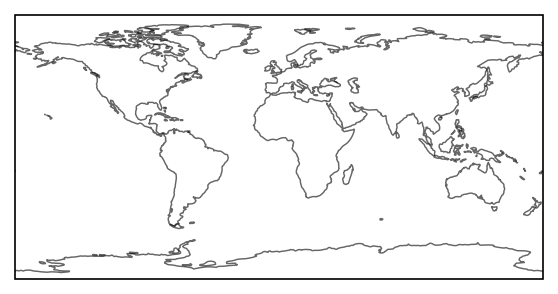

In [51]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.2, hspace=0.45)

# Crear subplots individuales
# Subplot 1 ANUAL HadGEM
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7, alpha=0.6)
cs1 = ax1.contourf(lonsHG, latsHG, u200HG_anual, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax1.contour(lonsHG, latsHG, u200HG_anual, levels=np.arange(0, 40, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('a$)$ Promedio anual en HadGEM3 (1979-2014)', fontsize=10,fontstyle='italic')

# Subplot 2 ANUAL ERA5
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.coastlines(linewidth=0.7, alpha=0.6)
cs2 = ax2.contourf(lonsE5, latsE5, u200E5_anual, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax2.contour(lonsE5, latsE5, u200E5_anual, levels=np.arange(0, 40, 3), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax2.clabel(cc, cc.levels, inline=True, fontsize=10)
ax2.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax2.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('b$)$ Promedio anual en ERA5 (1979-2019)', fontsize=10,fontstyle='italic')

# Subplot 3 DJF HadGEM
ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.coastlines(linewidth=0.7, alpha=0.6)
cs3 = ax3.contourf(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax3.contour(lonsHG, latsHG, uHG_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax3.clabel(cc, cc.levels, inline=True, fontsize=10)
ax3.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax3.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('c$)$ DJF en HadGEM3 (1979-2014)', fontsize=10,fontstyle='italic')

# Subplot 4 DJF ERA5
ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.7, alpha=0.6)
cs4 = ax4.contourf(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 3), cmap='GnBu', extend='max', transform=ccrs.PlateCarree())
cc = ax4.contour(lonsE5, latsE5, uE5_DJF, levels=np.arange(0, 50, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax4.clabel(cc, cc.levels, inline=True, fontsize=10)
ax4.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax4.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.title('d$)$ DJF en ERA5 (1979-2019)', fontsize=10,fontstyle='italic')

# Crear un único colorbar compartido
cbar = plt.colorbar(cs4, ax=[ax1, ax2, ax3, ax4], orientation='horizontal', fraction=0.2, pad=0.09,shrink=0.97)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=12)

# plt.suptitle('Viento zonal diario promedio a 200 hPa', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

# plt.show()

plt.savefig('figs/1_Viento_zonal1.png')